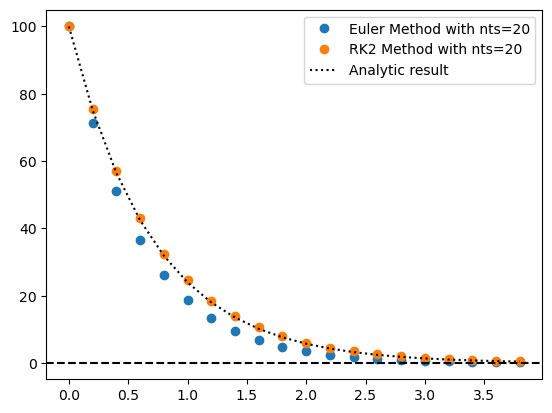

In [6]:
import numpy as np
import pylab as p

tau = 0.7        # mean lifetime, in gigayears
N0 = 100.0 # initial number of nuclei

tmin = 0.0
tmax = 4.0

nts=20

# Create an array to hold the times
t_array = np.linspace(tmin, tmax, nts, endpoint=False)  
dt = t_array[1] - t_array[0]  #  This is an easy way to define dt that is not error prone

# Empty array to hold the number of nuclei
N_array = np.zeros( len(t_array) )

# Empty array for Euler comparison
N_euler = np.zeros( len(t_array) )


# Do the simple Euler solution
# Set the initial condition
N_euler[0] = N0
for it in range(0, len(t_array)-1 ):
    N_euler[it+1] = N_euler[it] + dt * (-1./tau * N_euler[it])
    
# The above should have been familiar from Module 6.1

# Do the RK2 solution
N_array[0] = N0
for it in range(0, len(t_array)-1 ):
    t  = t_array[it]         # Don't necessarily need it but nice to have a simpler named variable
    th = t_array[it] + dt/2  # Note: we don't need this for this particular ODE
    
    N_h           = N_array[it] + (-1 / tau * N_array[it]) * (dt / 2)
    N_array[it+1] = N_array[it] + (-1 / tau * N_h) * dt
    
    
# Make a plot (note the label for the curve)
p.plot(t_array, N_euler, 'o', label="Euler Method with nts="+str(nts))
p.plot(t_array, N_array, 'o', label="RK2 Method with nts="+str(nts))
p.plot(t_array, N0*np.exp(-t_array/tau),'k:',label="Analytic result")

# Add a legend (based on the labels)
p.legend()

# Add a horizontal axis
p.axhline(0.0, color='k', linestyle='--')

# Show the plot
p.show()

Looks about nlike what I'd expect; now for HW4.2

0.3298505755939091
0.3503722925771156
0.3317511822565063
0.33003921817033693
0.329869425762637
0.3298524604699923
0.3298507640800368
[-1.68778631 -2.72110775 -3.72436028 -4.72468476 -5.7247172  -6.72472061]


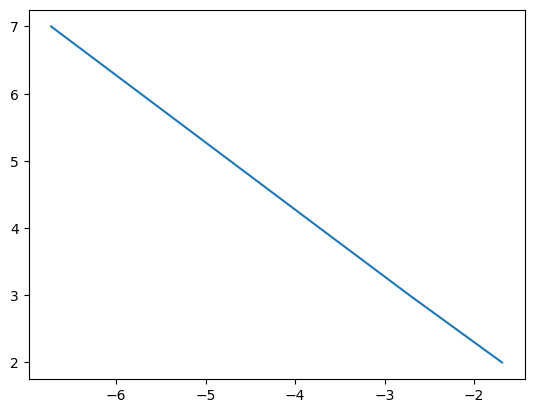

In [3]:
import numpy as np
import pylab as p

tau = 0.7        # mean lifetime, in gigayears
N0 = 100.0 # initial number of nuclei

tmin = 0.0
tmax = 4.0

nts=100

N_true = N0 * np.exp(-4 / tau)
print(N_true)
N_array = np.zeros(6)

i = 0
while nts <= 1E7:
    t_array = np.linspace(tmin, tmax, nts, endpoint=False)  
    dt = t_array[1] - t_array[0]  #  This is an easy way to define dt that is not error prone
    
    N_subarray = np.zeros( len(t_array) )
    
    N_subarray[0] = N0
    for it in range(0, len(t_array)-1 ):
        t  = t_array[it]         # Don't necessarily need it but nice to have a simpler named variable
        th = t_array[it] + dt/2  # Note: we don't need this for this particular ODE
        
        N_h           = N_subarray[it] + (-1 / tau * N_subarray[it]) * dt / 2
        N_subarray[it+1] = N_subarray[it] + (-1 / tau * N_h) * dt
        if it == len(t_array) - 2:
            N_array[i] = N_subarray[len(t_array) - 1]
            print(N_array[i])
    
    #p.plot(t_array, N_array, '.', label="RK2 Method with nts="+str(nts))
    nts *= 10
    i += 1

print(np.log10(abs(N_true - N_array)))
p.plot(np.log10(abs(N_true - N_array)), [2,3,4,5,6,7]) 
#p.legend()
p.show()

I am not sure why this implies the error is proportional to delta-t squared, but it is linear, which is good

110 0.03653262245690825 0.020521716983205873
120 0.03341721094066191 0.020521716983205873
130 0.030815690461303447 0.020521716983205873
140 0.028610671242561336 0.020521716983205873
150 0.026717969399708774 0.020521716983205873
160 0.025075646823542352 0.020521716983205873
170 0.023637121422907803 0.020521716983205873
180 0.022366687643257388 0.020521716983205873
190 0.021236518071104604 0.020521716983205873
200 0.02022460481892563 0.020521716983205873
Shapes: (191,) (191,)


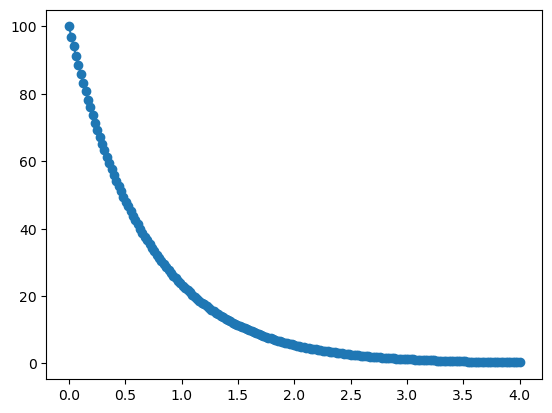

In [5]:
import numpy as np
import pylab as p

# This function calculates the RHS of the differential equation
# for the decay problem: just -(1/tau) * N
def decay_deriv(N,t):
    # The derivative in principle may depend on N and t -- in this
    # case, it only depends on N
    return -(1./tau) * N

# This function runs an Euler solver.  We have to tell it the initial
# value, the min/max time range, the number of time points,
# and how to compute the derivative (we pass in a function
# for this).
def Euler_solver(N_initial, tmin, tmax, nts, deriv):
    error = 1
    while error >= 0.3503722925771156 - 0.3298505755939091:
        N = np.zeros(nts+1)
        t = np.linspace(tmin, tmax, nts+1)
        
        # Note: a way of defining dt that is less error-prone
        dt = t[1] - t[0]
        N[0] = N_initial
        for it in range(0,nts):
            N[it+1] = N[it] + dt * deriv(N[it], t[it])
            if it == nts - 1:
                error = 0.3317511822565063 - N[it]
        nts += 10
        if int(nts / 10) == nts / 10:
            print(nts, error, 0.350372292577115 - 0.3298505755939091)
    
    return t, N

tau = 0.7        # mean lifetime
N0 = 100.0       # initial number of nuclei
tmin = 0.0       # start time
tmax = 4.0       # end time
nts= 100          # number of points


t,N_euler = Euler_solver(N0, tmin, tmax, nts, decay_deriv)

# I wonder what these things are?  Let's look at their shapes.
print ("Shapes:",np.shape(t), np.shape(N_euler))

p.plot(t,N_euler,'o-')
p.show()

Shapes: (6,) (21,)


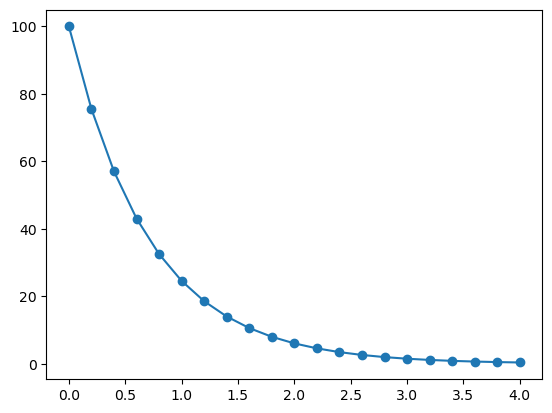

In [61]:
import numpy as np
import pylab as p

# This function calculates the RHS of the differential equation
# for the decay problem: just -(1/tau) * N
def decay_deriv(N,t):
    # The derivative in principle may depend on N and t -- in this
    # case, it only depends on N
    return -(1./tau) * N

# This function runs an Euler solver.  We have to tell it the initial
# value, the min/max time range, the number of time points,
# and how to compute the derivative (we pass in a function
# for this).
def RK2_solver(N_initial, tmin, tmax, nts, deriv):
    N_array = np.zeros(nts+1)
    t_array = np.linspace(tmin, tmax, nts+1)
    
    # Note: a way of defining dt that is less error-prone
    dt = t_array[1] - t_array[0]
    N_array[0] = N_initial
    for it in range(0,nts):
        t  = t_array[it]         # Don't necessarily need it but nice to have a simpler named variable
        N_h           = N_array[it] + (dt / 2) * decay_deriv(N_array[it], t_array[it])
        N_array[it+1] = N_array[it] + dt * decay_deriv(N_h, t_array[it])
    return t_array, N_array

tau = 0.7        # mean lifetime
N0 = 100.0       # initial number of nuclei
tmin = 0.0       # start time
tmax = 4.0       # end time
nts=20           # number of points

t_array,N_array = RK2_solver(N0, tmin, tmax, nts, decay_deriv)

# I wonder what these things are?  Let's look at their shapes.
print ("Shapes:",np.shape(t), np.shape(N_array))

p.plot(t_array,N_array,'o-')
p.show()

And with that small chang 4.3 is done, now to 4.4

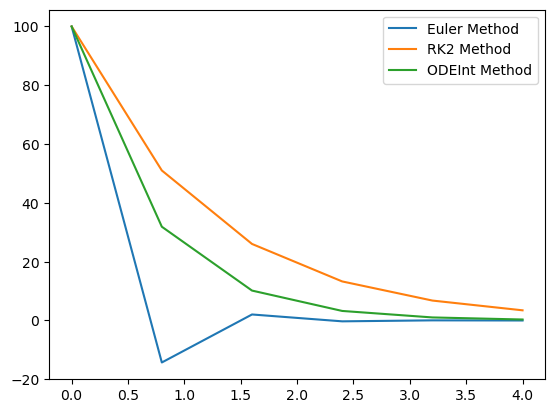

In [2]:
%reset -f
import numpy as np
import pylab as p
from scipy import integrate

tau = 0.7        # mean lifetime
N0 = 100.0       # initial number of nuclei
tmin = 0.0       # start time
tmax = 4.0       # end time

def decay_deriv(N,t):
    # The derivative in principle may depend on N and t -- in this
    # case, it only depends on N
    return -(1./tau) * N

def Euler_solver(N_initial, tmin, tmax, nts, deriv):
    N = np.zeros(nts+1)
    t = np.linspace(tmin, tmax, nts+1)
        
    # Note: a way of defining dt that is less error-prone
    dt = t[1] - t[0]
    N[0] = N_initial
    for it in range(0,nts):
        N[it+1] = N[it] + dt * deriv(N[it], t[it])
    
    return N

def RK2_solver(N_initial, tmin, tmax, nts, deriv):
    N_array = np.zeros(nts+1)
    t_array = np.linspace(tmin, tmax, nts+1)
    
    # Note: a way of defining dt that is less error-prone
    dt = t_array[1] - t_array[0]
    N_array[0] = N_initial
    for it in range(0,nts):
        t  = t_array[it]         # Don't necessarily need it but nice to have a simpler named variable
        N_h           = N_array[it] + (dt / 2) * decay_deriv(N_array[it], t_array[it])
        N_array[it+1] = N_array[it] + dt * decay_deriv(N_h, t_array[it])
    return N_array


nts = 5
t = np.linspace(tmin, tmax, nts+1)

N1 = Euler_solver(N0, tmin, tmax, nts, decay_deriv)
N2 = RK2_solver(N0, tmin, tmax, nts, decay_deriv)
N3 = integrate.odeint(decay_deriv, N0, t)
p.plot(t, N1, label="Euler Method")
p.plot(t, N2, label="RK2 Method")
p.plot(t, N3, label="ODEInt Method")
p.legend()

Obviously the ODEInt method is the best, and the others are bad.